In [ ]:
# Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## How a Monthly Payment (Equated Monthly Installment) is Calculated

### Calculating a Monthly Payment (Simplified)

In [ ]:
P = 31115 * (1.075)
r = 0.0702 / 12
n = 60
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator / denominator)
np.round(emi,2)

662.64

### Calculating a Monthly Payment (with some fees included)

In [ ]:
P = 400000
r = 0.04 / 12
n = 360
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator / denominator)
np.round(emi,2)

1909.66

In [ ]:
'The Monthly Payment with fees included is {} higher'.format(np.round(687.23 - 662.64,2))

'The Monthly Payment with fees included is 24.59 higher'

# How Interest Rates/APR Affects Monthly Payments

## Calculate Total Interest Paid

Here are the steps to do this

1-) Divide your interest rate by the number of payments (12) you'll make in the year (interest rates are expressed annually).


In [ ]:
# Calculate one month of interest
P = 400000
r = 0.0400 / 12

r * P

1333.3333333333335

2-) Calculate new principal (after one payment)

In [ ]:
400000 - (687.23 - 202.94)

399515.71

3-) Repeat steps 1 and 2 using the new principal until the principal reaches 0. You can see can example of this in the Python code below.

In [ ]:
import numpy as np
import pandas as pd

term = 60
P = 34689.96

def calc_interest(P,emi,interest_rate = 0.0702):
    interest_paid = np.floor(((interest_rate/12)*P)*100)/100
    principal_paid = np.round(emi-interest_paid, 2)
    new_balance = np.round(P - principal_paid,2)
    return(emi, interest_paid, principal_paid, new_balance)

payment_list = []
for n in range(1, term + 1):
    emi,i_paid,p_paid,new_p = calc_interest(P, emi)
    payment_list.append([n, P, emi, i_paid, p_paid, new_p])
    P = np.round(new_p,2)

In [ ]:
c_names = ['Month','Starting Balance','Repayment','Interest Paid','Principal Paid','New Balance']
payment_table = pd.DataFrame(payment_list, columns = c_names)

In [ ]:
payment_table.head(10)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
0,1,34689.96,1909.661182,202.93,1706.73,32983.23
1,2,32983.23,1909.661182,192.95,1716.71,31266.52
2,3,31266.52,1909.661182,182.90,1726.76,29539.76
3,4,29539.76,1909.661182,172.80,1736.86,27802.90
4,5,27802.90,1909.661182,162.64,1747.02,26055.88
5,6,26055.88,1909.661182,152.42,1757.24,24298.64
6,7,24298.64,1909.661182,142.14,1767.52,22531.12
7,8,22531.12,1909.661182,131.80,1777.86,20753.26
8,9,20753.26,1909.661182,121.40,1788.26,18965.00
9,10,18965.00,1909.661182,110.94,1798.72,17166.28


In [ ]:
np.round(payment_table['Interest Paid'].sum(), 2)

-7673.32

## Loan and Principal Plot

https://stackoverflow.com/questions/21918718/how-to-label-certain-x-values

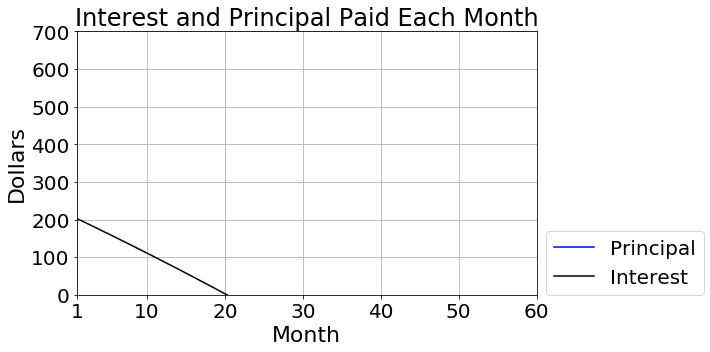

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('Interest_Principal.png', dpi = 1000)

## Refinancing Cost Comparison

3.59% vs 7.02% (show the cost of refinancing a car, assuming no prepayment penalty)

In [ ]:
P = 34689.96
term = 60

def generate_loan_table(P, term, interest_rate=0.0702):

    def calc_emi(P, n, interest_rate):
        r = interest_rate / 12
        numerator = (r *((1 + r)**(n)) )
        denominator = ((1 + r)**(n)) - 1
        emi = P * (numerator / denominator)
        emi = np.round(emi, 2)
        return(emi)

    def calc_interest(P, emi, interest_rate):
        i_paid = np.floor(((interest_rate/12)*P)*100)/100
        p_paid = np.round(emi - i_paid, 2)
        new_p = np.round(P - p_paid,2)
        return(emi, i_paid, p_paid, new_p)

    emi = calc_emi(P, term, interest_rate)
    payment_list = []

    for n in range(1, term + 1):
        emi,i_paid,p_paid, new_p = calc_interest(P, emi, interest_rate)
        payment_list.append([n, P,emi, i_paid, p_paid, new_p])
        P = np.round(new_p,2)

    payment_table = pd.DataFrame(payment_list, columns = ['Month',
                                                       'Starting Balance',
                                                       'Repayment',
                                                       'Interest Paid',
                                                       'Principal Paid',
                                                       'New Balance'])
    return(payment_table, np.round(payment_table['Interest Paid'].sum(), 2), emi)

In [ ]:
o_table, o_paid, o_emi = generate_loan_table(P,term,interest_rate=0.0702)
r_table, r_paid, r_emi = generate_loan_table(P,term,interest_rate=0.0359)

## Total Interest Through Different Loan Terms

In [ ]:
P = 400000

In [ ]:
mortgage30_03, original_paid, original_emi = generate_loan_table(P, term = 360, interest_rate = 0.0300)
mortgage15_03, seventyTwo_paid, seventyTwo_emi = generate_loan_table(P, term = 180, interest_rate = 0.0300)

In [ ]:
mortgage30_05, original_paid, original_emi = generate_loan_table(P, term = 360, interest_rate = 0.0500)
mortgage15_05, seventyTwo_paid, seventyTwo_emi = generate_loan_table(P, term = 180, interest_rate = 0.0500)

In [ ]:
mortgage30_03.loc[:, 'Mortgage Name'] = '30 Year'
mortgage30_03.loc[:, 'Interest Rate'] = 0.03

mortgage15_03.loc[:, 'Mortgage Name'] = '15 Year'
mortgage15_03.loc[:, 'Interest Rate'] = 0.03

mortgage30_05.loc[:, 'Mortgage Name'] = '30 Year'
mortgage30_05.loc[:, 'Interest Rate'] = 0.05

mortgage15_05.loc[:, 'Mortgage Name'] = '15 Year'
mortgage15_05.loc[:, 'Interest Rate'] = 0.05

In [ ]:
#finalDF = pd.concat([mortgage30_03, mortgage30_05, mortgage15_03,mortgage15_05])

In [ ]:
#finalDF.to_csv('mortgages.csv', index = False)

In [ ]:
#finalDF

In [ ]:
original_emi, seventyTwo_emi

(2147.29, 3163.17)

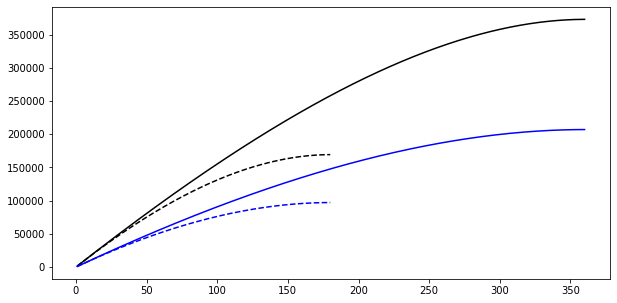

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k', linestyle = '-', markersize = 10, label = '30 Year 5% APR');
axes.plot(mortgage15_05['Month'], mortgage15_05['Interest Paid'].cumsum(), c = 'k', linestyle = '--', markersize = 10, label = '15 Year 5% APR');
axes.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b', linestyle = '-', markersize = 10, label = '30 Year 3% APR ');
axes.plot(mortgage15_03['Month'], mortgage15_03['Interest Paid'].cumsum(), c = 'b', linestyle = '--', markersize = 10, label = '15 Year 3% APR ');


#axes.set_xlim((1, 72));
#axes.set_xticks([1, 12, 24, 36, 48, 60, 72])
#axes.set_ylim((0, 9000));
#axes.set_ylabel('Dollars', fontsize = 24);
#axes.set_xlabel('Month', fontsize = 24);

#plt.xticks(fontsize = 22)
#plt.yticks(fontsize = 22)
#axes.set_title('Total Interest Paid', fontsize = 26)

#plt.legend(loc="lower right", fontsize = 10)
#plt.tight_layout()
#plt.grid(axis = 'both')
#plt.savefig('Total_Interest_Paid_DifferentMortgages.png', dpi = 1000)

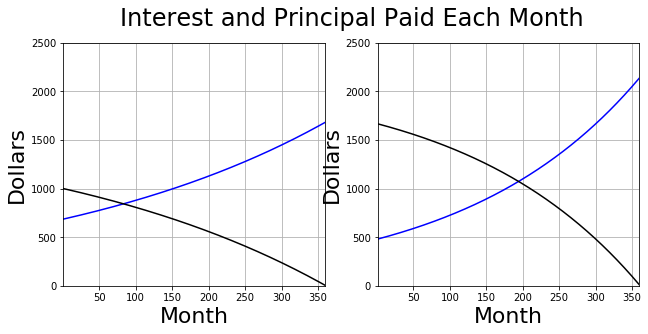

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5) )
axes[0].plot(mortgage30_03['Month'], mortgage30_03['Principal Paid'], c = 'b', label = 'Principal');
axes[0].plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'], c = 'k', label = 'Interest');

axes[1].plot(mortgage30_05['Month'], mortgage30_05['Principal Paid'], c = 'b', label = 'Principal');
axes[1].plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'], c = 'k', label = 'Interest');


axes[0].set_xlim((1, 360));
axes[1].set_xlim((1, 360));
axes[0].set_ylim((0, 2500));
axes[1].set_ylim((0, 2500));

#axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
#axes.set_ylim((0, 700));
axes[0].set_ylabel('Dollars', fontsize = 22);
axes[0].set_xlabel('Month', fontsize = 22);
axes[1].set_ylabel('Dollars', fontsize = 22);
axes[1].set_xlabel('Month', fontsize = 22,);


#plt.xticks(fontsize = 22)
#plt.yticks(fontsize = 22)
fig.subplots_adjust(top=0.8, left = .1, right = .9)
fig.suptitle('Interest and Principal Paid Each Month',y = .9, fontsize = 24)

#axes[0].legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
#fig.tight_layout()
axes[0].grid(axis = 'both')
axes[1].grid(axis = 'both')
#plt.savefig('Interest_Principal.png', dpi = 1000)

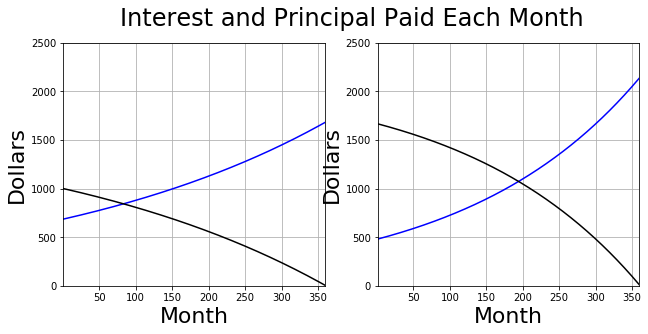

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5) )
axes[0].plot(mortgage30_03['Month'], mortgage30_03['Principal Paid'], c = 'b', label = 'Principal');
axes[0].plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'], c = 'k', label = 'Interest');

axes[1].plot(mortgage30_05['Month'], mortgage30_05['Principal Paid'], c = 'b', label = 'Principal');
axes[1].plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'], c = 'k', label = 'Interest');


axes[0].set_xlim((1, 360));
axes[1].set_xlim((1, 360));
axes[0].set_ylim((0, 2500));
axes[1].set_ylim((0, 2500));

#axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
#axes.set_ylim((0, 700));
axes[0].set_ylabel('Dollars', fontsize = 22);
axes[0].set_xlabel('Month', fontsize = 22);
axes[1].set_ylabel('Dollars', fontsize = 22);
axes[1].set_xlabel('Month', fontsize = 22,);


#plt.xticks(fontsize = 22)
#plt.yticks(fontsize = 22)
fig.subplots_adjust(top=0.8, left = .1, right = .9)
fig.suptitle('Interest and Principal Paid Each Month',y = .9, fontsize = 24)

#axes[0].legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
#fig.tight_layout()
axes[0].grid(axis = 'both')
axes[1].grid(axis = 'both')
#plt.savefig('Interest_Principal.png', dpi = 1000)